## Problem Statement:A bank is investigating a very high rate of customers leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.


**PROJECT DESCRIPTION:**


 **1.EDA AND PREPROCESSING**

**2.BUILDING NEURAL NETWORK**

**3.ENSEMBLING**

**4.DATA VISUALIZATION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
path="/content/drive/MyDrive/DL=SUKAMAL DAS/DL PROJECT/Churn_Modelling.csv"
df=pd.read_csv(path)

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df.drop("RowNumber",axis=1,inplace=True)

In [7]:
df.drop("CustomerId",axis=1,inplace=True)

In [8]:
df.drop("Surname",axis=1,inplace=True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### DATA INSPECTION

In [10]:
df.shape

(10000, 11)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Check Missing Values

In [13]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## THERE IS NO MISSING VALUE IN MY DATASET

### CHECKING OUTLIER

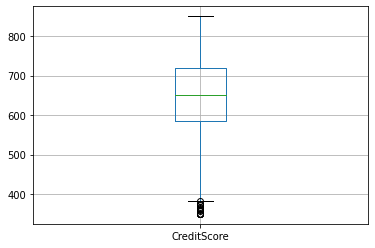

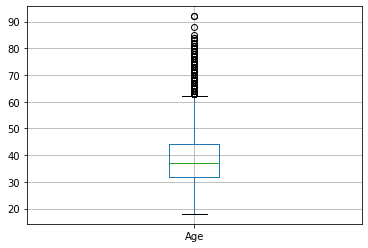

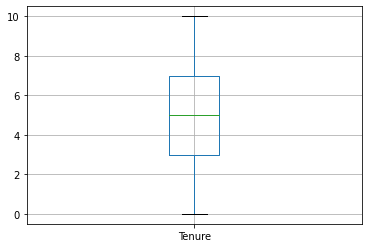

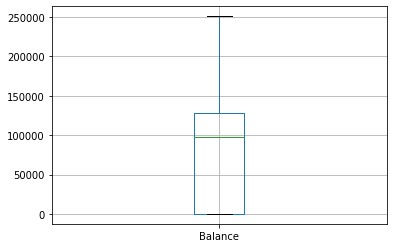

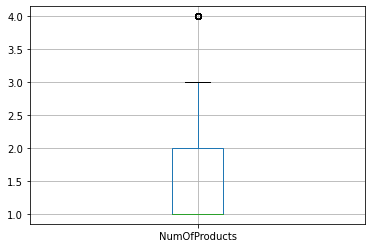

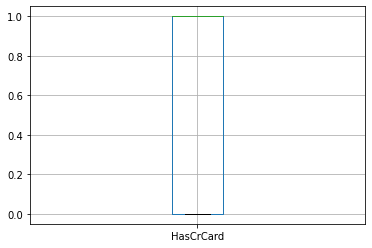

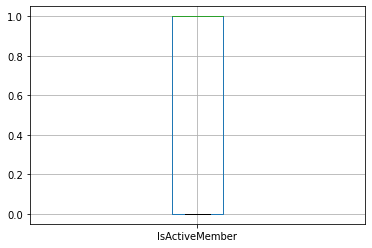

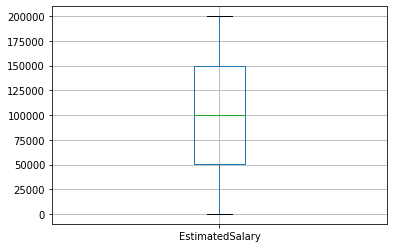

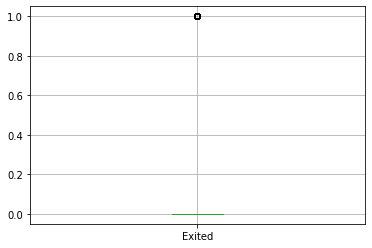

In [14]:
import matplotlib.pyplot as plt
colname=[]
for x in df.columns[:]:
    if df[x].dtype=="int64" or df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    df.boxplot(column=x)
    plt.show()

In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


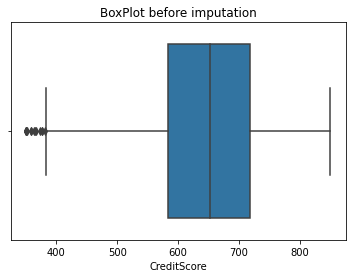

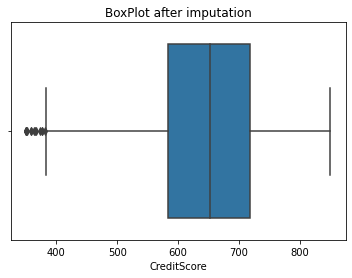

In [16]:
import numpy as np
import seaborn as sns

sns.boxplot(df["CreditScore"])
plt.title("BoxPlot before imputation")
plt.show()
for i in df["CreditScore"]:
  q1=df["CreditScore"].quantile(0.05)
  q3=df["CreditScore"].quantile(0.75)
  iqr=q3-q1
  Lower_tail=q1-1.5*iqr
  Upper_tail=q3+1.5*iqr
  if i>Upper_tail or i<Lower_tail:
    df["CreditScore"]=df["CreditScore"].replace(i,np.mean(df["CreditScore"]))
sns.boxplot(df["CreditScore"])
plt.title("BoxPlot after imputation")
plt.show() 

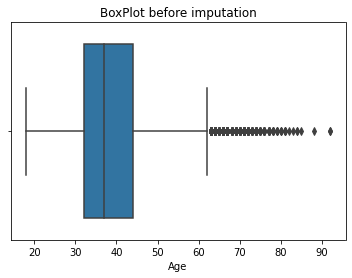

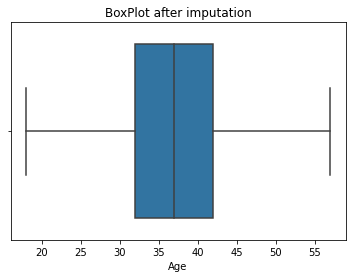

In [17]:
import numpy as np
import seaborn as sns

sns.boxplot(df["Age"])
plt.title("BoxPlot before imputation")
plt.show()
for i in df["Age"]:
  q1=df["Age"].quantile(0.25)
  q3=df["Age"].quantile(0.75)
  iqr=q3-q1
  Lower_tail=q1-1.5*iqr
  Upper_tail=q3+1.5*iqr
  if i>Upper_tail or i<Lower_tail:
    df["Age"]=df["Age"].replace(i,np.mean(df["Age"]))
sns.boxplot(df["Age"])
plt.title("BoxPlot after imputation")
plt.show() 

# LABEL ENCODING

In [18]:
colname=[]
for X in df.columns:
    if df[X].dtype=="object":
      colname.append(X)
colname

['Geography', 'Gender']

In [19]:
from sklearn import preprocessing 

le=preprocessing.LabelEncoder() 
for x in colname: 
    df[x]=le.fit_transform(df[x]) 

In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1,0,92888.52,1


# Skewness

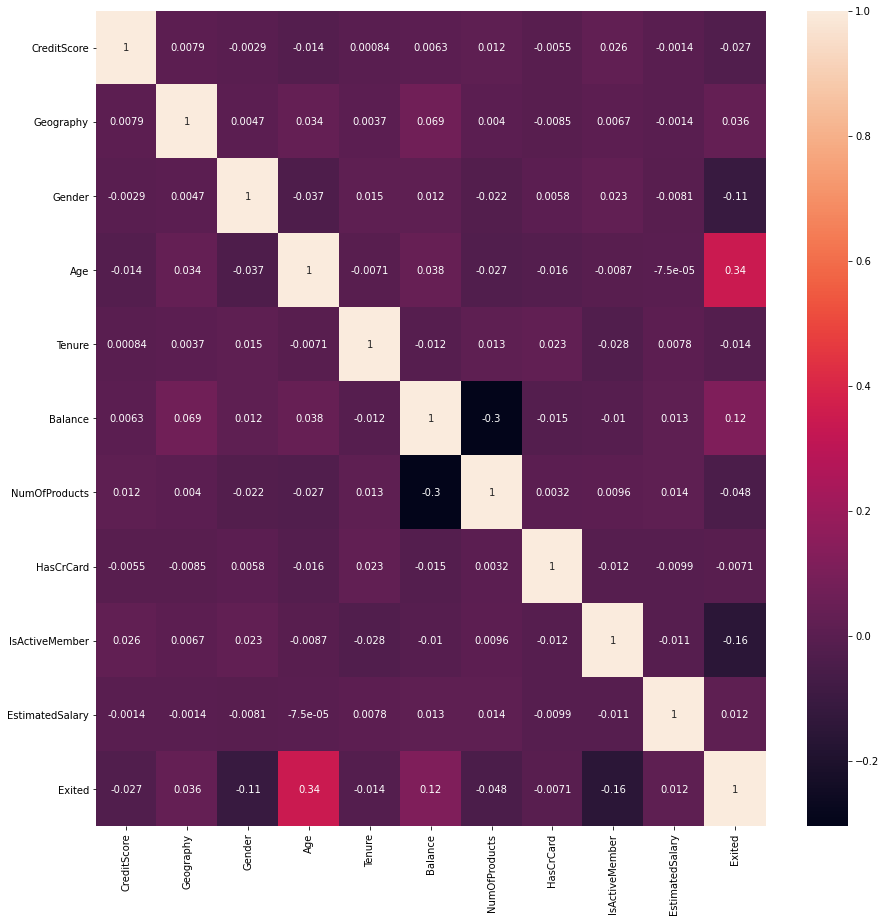

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

skewness:  -0.14108754375291138


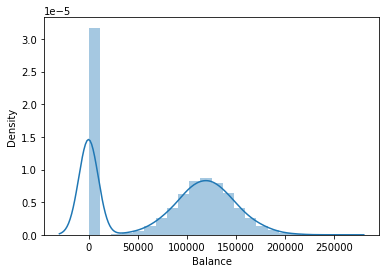

In [22]:
from scipy.stats import skew
print("skewness: ",skew(df["Balance"]))
sns.distplot(df["Balance"])
plt.show()

In [23]:
# Removing skewness 
df["Balance"] = np.sqrt(df["Balance"])

skewness:  -0.44270826404772506


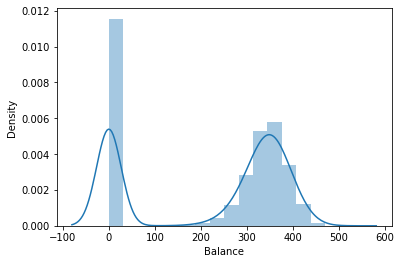

In [24]:
print("skewness: ",skew(df["Balance"]))
sns.distplot(df["Balance"])
plt.show()

In [25]:
y = df["Exited"]
X= df.drop("Exited",axis=1)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Scaling

In [27]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [28]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [29]:
df.shape

(10000, 11)

In [30]:
X_train.shape

(7000, 10)

In [31]:
y = df["Exited"]
X= df.drop("Exited",axis=1)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = lr1.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2373
           1       0.58      0.10      0.17       627

    accuracy                           0.80      3000
   macro avg       0.69      0.54      0.53      3000
weighted avg       0.76      0.80      0.73      3000



## Under sampling

In [36]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [37]:
pd.Series(y_sample1).value_counts()

1    1410
0    1410
dtype: int64

In [38]:
lr2 = LogisticRegression()
lr2.fit(X_sample1, y_sample1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred2 = lr2.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      2373
           1       0.33      0.68      0.44       627

    accuracy                           0.65      3000
   macro avg       0.61      0.66      0.59      3000
weighted avg       0.77      0.65      0.68      3000



# Over sampling

In [41]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_sample2, y_sample2 = ros.fit_sample(X_train,y_train)

In [42]:
pd.Series(y_sample2).value_counts()

1    5590
0    5590
dtype: int64

In [43]:
lr3 = LogisticRegression()
lr3.fit(X_sample2, y_sample2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred3= lr3.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.63      0.74      2373
           1       0.33      0.69      0.45       627

    accuracy                           0.64      3000
   macro avg       0.61      0.66      0.59      3000
weighted avg       0.77      0.64      0.68      3000



## CREATE NEURAL NETWORK

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(8, activation="tanh", input_dim=10))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy")

In [48]:
trained_model = model.fit(X_train_ss, y_train, epochs=50,batch_size=10)

Epoch 1/50
700/700 [==============================] - 2s 1ms/step - loss: 0.4933
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4099
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3975
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3878
Epoch 5/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3804
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3746
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3705
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3672
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3637
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3617
Epoch 11/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3602
Epoch 12/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3582
Epoch 13/50
700/700 [====

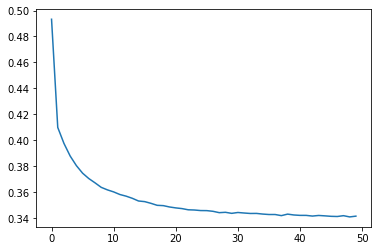

In [49]:
plt.plot(trained_model.history["loss"])

## PREDICTION

In [50]:
y_pred = model.predict(X_test_ss)

In [51]:
y_pred

array([[0.0572857 ],
       [0.07006121],
       [0.06612813],
       ...,
       [0.04113173],
       [0.11067513],
       [0.2788814 ]], dtype=float32)

## MANUAL PREDICTION

In [52]:
y_pred = np.where(y_pred >= 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## EVOLUATION


In [53]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2373
           1       0.74      0.40      0.51       627

    accuracy                           0.84      3000
   macro avg       0.80      0.68      0.71      3000
weighted avg       0.83      0.84      0.83      3000



## Ensembling 

## Running Decision Tree model

In [54]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [55]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini", min_samples_leaf=5,
                                          max_depth=10,
                                          random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_sample1,y_sample1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [56]:
y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1752  621]
 [ 174  453]]
0.735
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2373
           1       0.42      0.72      0.53       627

    accuracy                           0.73      3000
   macro avg       0.67      0.73      0.67      3000
weighted avg       0.81      0.73      0.76      3000



## Running Random Forest model

In [58]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [59]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=101, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_sample1,y_sample1)

y_pred=model_RandomForest.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1829  544]
 [ 160  467]]
0.7653333333333333
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2373
           1       0.46      0.74      0.57       627

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.82      0.77      0.78      3000



## Running Adaboost classifier

In [61]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [62]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_sample1,y_sample1)
y_pred=model_AdaBoost.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1708  665]
 [ 209  418]]
0.7086666666666667
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2373
           1       0.39      0.67      0.49       627

    accuracy                           0.71      3000
   macro avg       0.64      0.69      0.64      3000
weighted avg       0.79      0.71      0.73      3000



## Running Gradient Boosting classifier

In [64]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [ ]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=150,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_sample1,y_sample1)

y_pred=model_GradientBoosting.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## DATA VISUALIZATION

In [ ]:
sns.countplot(x=df.Geography, data=df, hue=df.Exited)

In [ ]:
sns.countplot(x=df.Geography, data=df)

In [ ]:
sns.countplot(x=df.Gender, data=df, hue=df.Exited)#here 0=France,1=Spain,2=Germany

In [ ]:
sns.countplot(x=df.Gender, data=df)# here 0=Female,1=Male

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=df.EstimatedSalary, y=df.Balance, data=df)
plt.show()

In [ ]:
sns.distplot(df.CreditScore)

In [ ]:
sns.distplot(df.EstimatedSalary)

In [ ]:
sns.distplot(df.Balance)

In [ ]:
df["Exited"].value_counts()

#CONCLUSION:THIS PROJECT WAS EXECUTED SUCCESSFULLY AND OUT OF 10000 CUSTOMERS  2037 CUSTOMERS ARE LEAVED.

## GRADIENT BOOSTING ALGORITHM GIVE HIGHEST ACCURACY OF MODEL


## GRADIENT BOOSTING ACCURACY=79%

In [ ]:
df["Exited"].value_counts()